In [1]:
%matplotlib inline

In [2]:
import pathlib

In [3]:
import joblib
import lightgbm as lgb
import pandas as pd

In [4]:
root_dir_path = pathlib.Path("..")
data_dir_path = root_dir_path / "data"
processed_dir_path = data_dir_path / "processed"
train_path = processed_dir_path / "train.parquet"
models_dir_path = root_dir_path / "models"
model_path = models_dir_path / "model.joblib"

In [5]:
train = pd.read_parquet(train_path)

In [6]:
train.shape

(58327370, 15)

In [7]:
is_train = train["date"] <= "2016-01-28"
train, valid = train[is_train], train[~is_train]

In [8]:
train.shape

(55674740, 15)

In [9]:
valid.shape

(2652630, 15)

In [10]:
data = train.select_dtypes("number")
data_valid = valid.select_dtypes("number")

In [11]:
data.describe(include="all")

,demand,wm_yr_wk,snap_CA,snap_TX,snap_WI,sell_price
count,5.567474e+07,5.567474e+07,5.567474e+07,5.567474e+07,5.567474e+07,4.337545e+07
mean,1.114015e+00,1.132648e+04,3.285871e-01,3.285871e-01,3.285871e-01,4.403568e+00
std,3.882690e+00,1.418930e+02,4.696995e-01,4.696995e-01,4.696995e-01,3.395343e+00
min,0.000000e+00,1.110100e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02
25%,0.000000e+00,1.121400e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.180000e+00
50%,0.000000e+00,1.132700e+04,0.000000e+00,0.000000e+00,0.000000e+00,3.470000e+00
75%,1.000000e+00,1.143900e+04,1.000000e+00,1.000000e+00,1.000000e+00,5.840000e+00
max,7.630000e+02,1.155200e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.073200e+02


In [12]:
X = data
X_valid = data_valid
y = data.pop("demand")
y_valid = data_valid.pop("demand")

In [13]:
model = lgb.LGBMRegressor(importance_type="gain", random_state=0)

In [14]:
model.fit(X, y, early_stopping_rounds=10, eval_set=[(X_valid, y_valid)])

[1]	valid_0's l2: 13.2085
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 13.0117
[3]	valid_0's l2: 12.8617
[4]	valid_0's l2: 12.7348
[5]	valid_0's l2: 12.6425
[6]	valid_0's l2: 12.5616
[7]	valid_0's l2: 12.4856
[8]	valid_0's l2: 12.4333
[9]	valid_0's l2: 12.3899
[10]	valid_0's l2: 12.3557
[11]	valid_0's l2: 12.3247
[12]	valid_0's l2: 12.3036
[13]	valid_0's l2: 12.2755
[14]	valid_0's l2: 12.2509
[15]	valid_0's l2: 12.232
[16]	valid_0's l2: 12.2133
[17]	valid_0's l2: 12.2014
[18]	valid_0's l2: 12.1934
[19]	valid_0's l2: 12.1846
[20]	valid_0's l2: 12.1779
[21]	valid_0's l2: 12.1711
[22]	valid_0's l2: 12.164
[23]	valid_0's l2: 12.1598
[24]	valid_0's l2: 12.1603
[25]	valid_0's l2: 12.1556
[26]	valid_0's l2: 12.1529
[27]	valid_0's l2: 12.1511
[28]	valid_0's l2: 12.1516
[29]	valid_0's l2: 12.1493
[30]	valid_0's l2: 12.1472
[31]	valid_0's l2: 12.1487
[32]	valid_0's l2: 12.1479
[33]	valid_0's l2: 12.1479
[34]	valid_0's l2: 12.1468
[35]	valid_0's l2: 12.1457
[36]	

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='gain', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

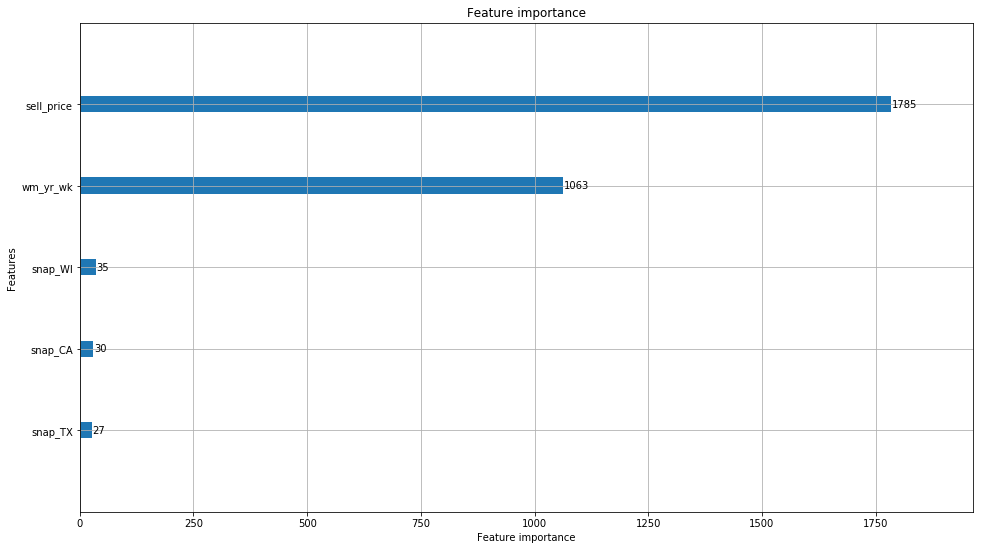

In [15]:
ax = lgb.plot_importance(model, figsize=(16, 9))

In [16]:
joblib.dump(model, model_path)

['..\\models\\model.joblib']